# State of the art

## Libraries

Let's load the libraries for this notebook:
- **Pandas** to create and manipulate dataframes
- **Wordcloud** to create a word cloud
- **Matplotlib** to plot the word cloud

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from collections import Counter
from wordcloud import WordCloud

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")

Pandas: 1.2.4
Matplotlib: 3.4.2


## Dataset

The paper [Anomalous Sound Detection with Machine Learning: A Systematic Review](https://www.arxiv-vanity.com/papers/2102.07820/) gathers info about 32 papers about *anomalous sound detection* published in the last years. It shows that the ToyADMOS, MIMII, and Mivia datasets, the Mel-frequency cepstral coefficients (MFCC) method for extracting features, the Autoencoder (AE) and Convolutional Neural Network (CNN) models of ML, the AUC and F1-score evaluation methods were most cited.

In [3]:
state_art_df = pd.read_csv("https://raw.githubusercontent.com/xiaoxi-david/malfunctioning-machines/main/development/jupyter/csv/state_art.csv")

This dataframe shows which dataset, audio features, ML model and evaluation model used each paper. 

In [4]:
state_art_df.head(5)

,Study,Year,Dataset,Audio Features,ML Model,Evaluation Method
0,[23],2020,Mivia Dataset [8],"STFT, MFCC, Mel-Scale","DenseNet-121, MobileNetV2, ResNet-50","RR, MDR, ER, FPR, Accuracy"
1,[24],2020,"ToyADMOS [11],MIMII [12]",Mel-Filterbank,"SPIDERnet, AE, Naive MSE, PROTOnet","ROC-AUC, TPR, FPR, F-measure"
2,[25],2020,Mivia Dataset [8],"Audio Power, Audio harmonicity, Total loudness...","one-class SVM, DNN","Accuracy, F1-score, Precision"
3,[26],2020,Own Dataset,"MFCC, Mel filterbank energies",LSTM,"Accuracy, F1-score"
4,[27],2020,"Own Dataset, Freesound [12]","MFCC, DWT, ZCR, SR, GFCC","SVM, Random Forest, CNN, KNN Gradient Boosting","Precision, Recall, F1-score, Accuracy, p-value"


Let's create an auxiliary function to make summaries of each column.

In [5]:
def show_most_popular(col: str, n: int):
    """
    Clean, split and upper the strings 
    of the column col to make a list 
    with the n most popular strings.
    """
    return (
        state_art_df[col]
        .str.replace(r"( \[\d{1,2}\]|and|,$)", "")
        .str.split(",", expand=True)
        .melt()["value"]
        .str.upper()
        .str.strip()
        .value_counts()
        .head(n)
    )

## Summary

The three most cited datasets were: [ToyADMOS](https://www.arxiv-vanity.com/papers/1908.03299/), [MIMII](https://www.arxiv-vanity.com/papers/1909.09347/), and [Mivia](https://mivia.unisa.it/datasets/audio-analysis/mivia-audio-events/). 
- The **ToyADMOS** dataset is a machine operating sound dataset that has approximately 540 hours of normal sound and approximately 12,000 hours of anomalous sound. ToyADMOS was designed to detect audio anomalies in research involving machine operation. 
- The **MIMII** dataset is a data set for investigation and inspection of defective industrial machines. It contains the sounds generated from four types of industrial machines (valves, pumps, fans and slide rails).
- The **Mivia** dataset is an audio dataset composed of 6,000 events considered to be vigilance (glass break, shots and screams).

In [6]:
show_most_popular("Dataset", 5)

OWN DATASET      10
MIMII             8
TOYADMOS          8
TUT DATASET       4
MIVIA DATASET     4
Name: value, dtype: int64

The main methods of extracting features were: [Mel-frequency cepstral coefficients (MFCCs)](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum), Log-Mel Energy, and Mel-spectrogram

In [7]:
show_most_popular("Audio Features", 5)

MFCC                10
LOG-MEL ENERGIES     7
MEL-SPECTROGRAM      5
ZCR                  4
DWT                  3
Name: value, dtype: int64

The two most popular machine learning techniques were: the [Autoencoder (AE)](https://en.wikipedia.org/wiki/Autoencoder) and the [Convolutional Neural Network (CNN)](https://en.wikipedia.org/wiki/Convolutional_neural_network). 

In [8]:
show_most_popular("ML Model", 5)

AE               7
ONE-CLASS SVM    5
CNN              4
CAE              4
WAVENET          3
Name: value, dtype: int64

The most used metrics were: 
- **AUC-ROC** is a performance evaluation that involves classification problems with thresholds. AUC represents a degree of separability and ROC is a probability curve.
The higher the AUC, the better the model for predicting a particular class. 
- **F1-score** measures the accuracy of an ML model. It is widely used in classification.

In [9]:
show_most_popular("Evaluation Method", 5)

ROC-AUC     19
F1-SCORE    12
ACCURACY     6
ROC-PAUC     5
ER           5
Name: value, dtype: int64

## Word cloud

Let's create a word cloud with the info from the dataset.

In [10]:
columns = ["Dataset", "Audio Features", "ML Model", "Evaluation Method"]

word_cloud_lst = []

#Format columns to make a list
for col in columns:
  values = (
      state_art_df[col]
      .str.replace(r'( \[\d{1,2}\]|and|,$)', '')
      .str.split(",", expand=True)
      .melt()['value']
      .str.upper()
      .str.strip()
      .dropna()
      .to_list()
      )

  # Create a counter with the values from the previous list 
  ct = Counter(values)  
  wordcloud = WordCloud().generate_from_frequencies(ct)
  word_cloud_lst.append(wordcloud)

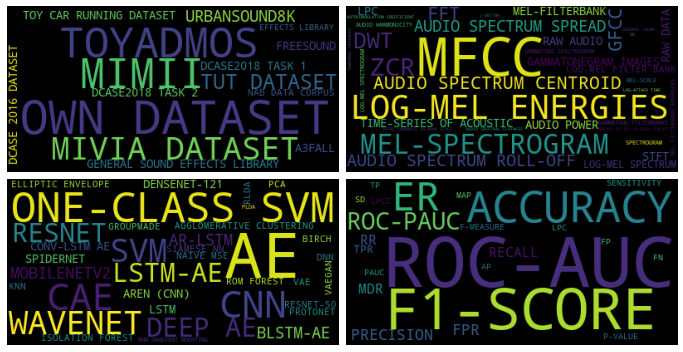

In [11]:
fig = plt.figure(figsize=(12, 12))
grid = ImageGrid(
    fig,
    111,
    nrows_ncols=(2, 2),  # creates 2x2 grid of axes
    axes_pad=0.1,  # pad between axes in inch.
)

for ax, im in zip(grid, word_cloud_lst):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.axis("off")

plt.show()

Lastly, we can save it.

In [12]:
fname = os.path.join('wordcloud.png')
fig.savefig(fname, dpi=300, bbox_inches='tight')